formation start	2018-01-01	formation end	2020-01-01
transaction start	2020-01-01	transaction end	2020-12-01
RESULTS will be saved at rev_result_2Y_11M//2020-01-01_2Y_2020-01-01_11M/


100%|██████████| 6/6 [00:01<00:00,  4.08it/s]


run cost time 45.487056732177734 s



Start date,2020-01-02
End date,2020-12-01
Total months,10
,Backtest
Annual return,51352.6%
Cumulative returns,23770.5%
Annual volatility,17169.0%
Sharpe ratio,-1.03
Calmar ratio,3.16
Stability,NaN
Max drawdown,-16259.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,186.33,2020-02-04,2020-02-18,2020-03-09,25
1,43.32,2020-01-22,2020-01-23,2020-02-03,9
2,38.90,2020-07-17,2020-07-27,2020-10-30,76
3,38.21,2020-05-21,2020-05-29,2020-06-18,21
4,16.58,2020-03-13,2020-03-27,2020-04-30,35


ERR:TRANSACTION - 2020-01-01 TO 2020-12-01 evaluation NaT


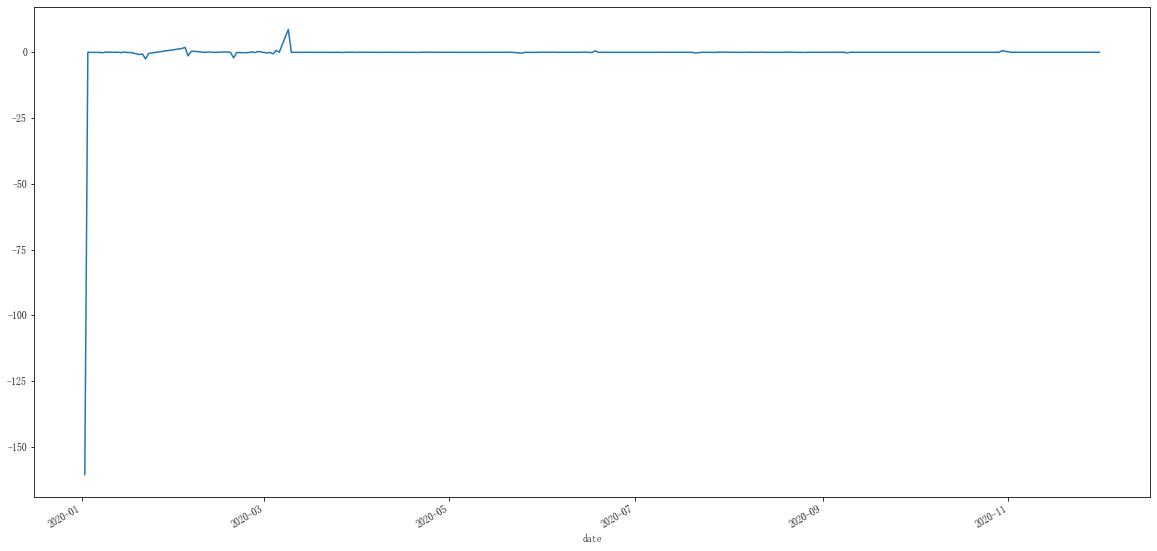

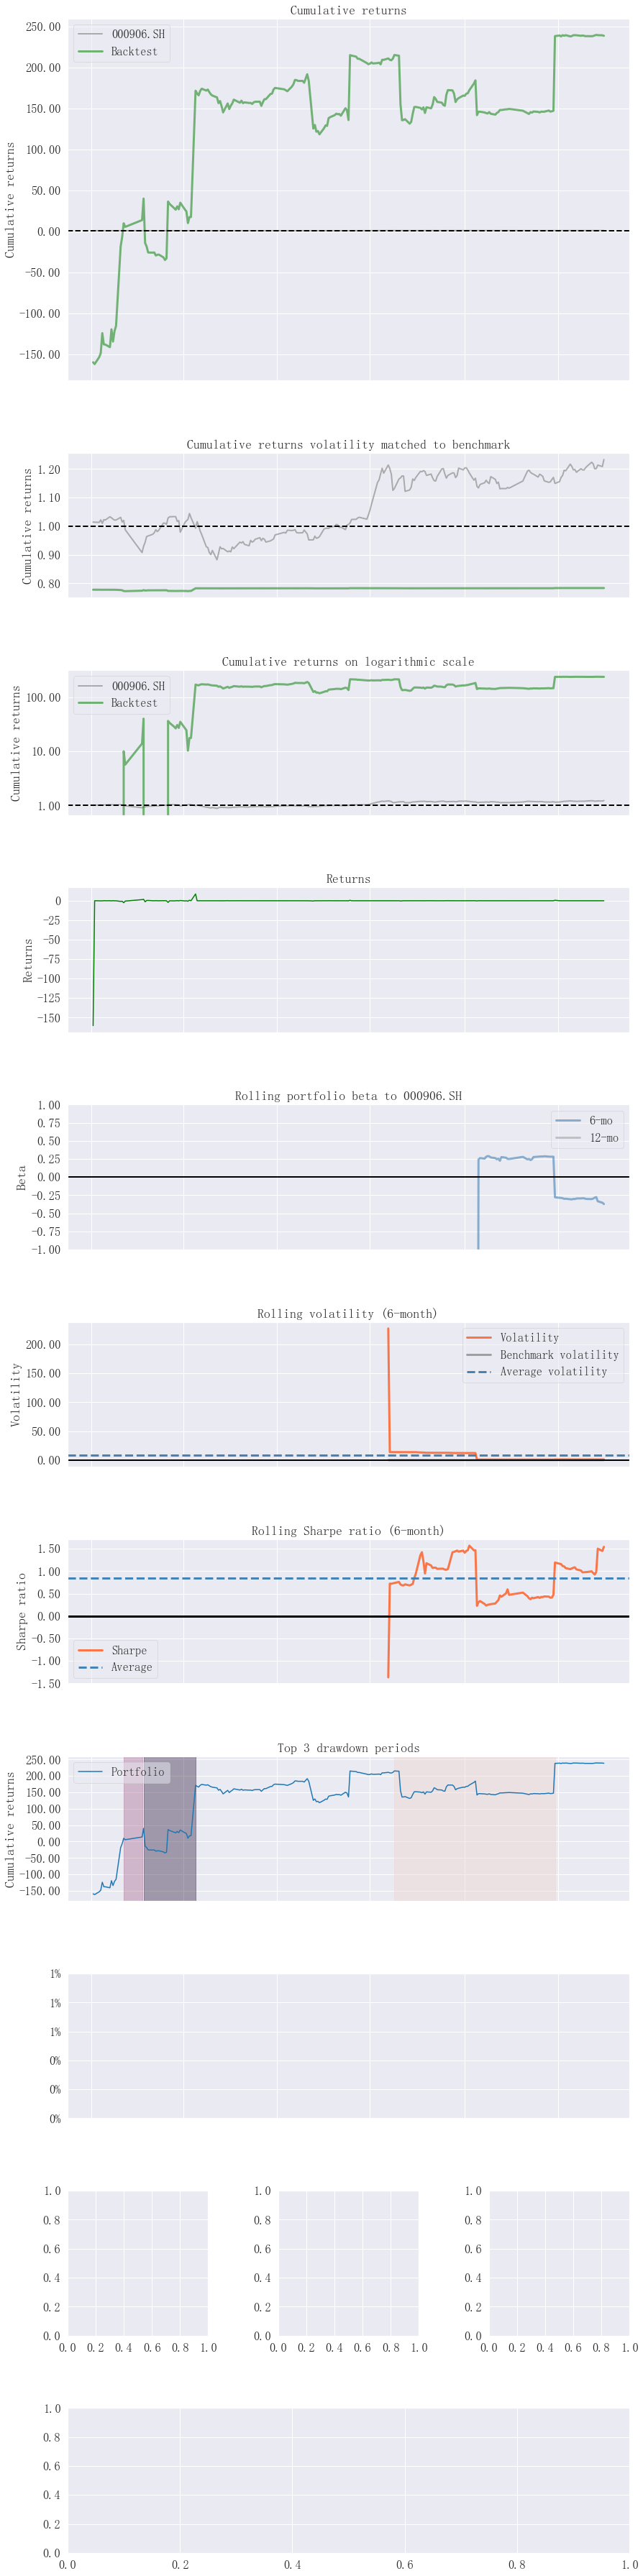

formation start	2018-12-01	formation end	2020-12-01
transaction start	2020-12-01	transaction end	2021-11-01
RESULTS will be saved at rev_result_2Y_11M//2020-12-01_2Y_2020-12-01_11M/


100%|██████████| 20/20 [00:05<00:00,  3.85it/s]


run cost time 56.68826913833618 s



Start date,2020-12-01
End date,2021-11-01
Total months,10
,Backtest
Annual return,105900.5%
Cumulative returns,46154.3%
Annual volatility,13377.4%
Sharpe ratio,0.23
Calmar ratio,13.28
Stability,NaN
Max drawdown,-7977.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,99.79,2021-01-04,2021-02-26,2021-03-02,42
1,45.30,2021-03-18,2021-04-06,2021-05-12,40
2,36.85,2021-07-08,2021-08-16,NaT,NaN
3,35.27,2021-05-24,2021-06-23,2021-07-01,29
4,32.47,2020-12-18,2020-12-21,2020-12-28,7


ERR:TRANSACTION - 2020-12-01 TO 2021-11-01 evaluation NaT


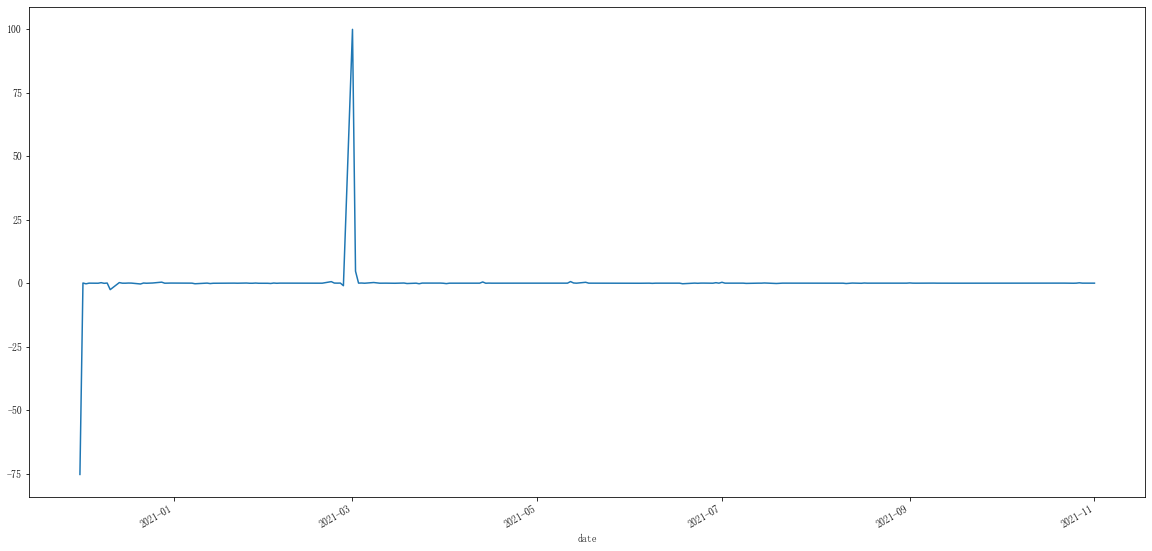

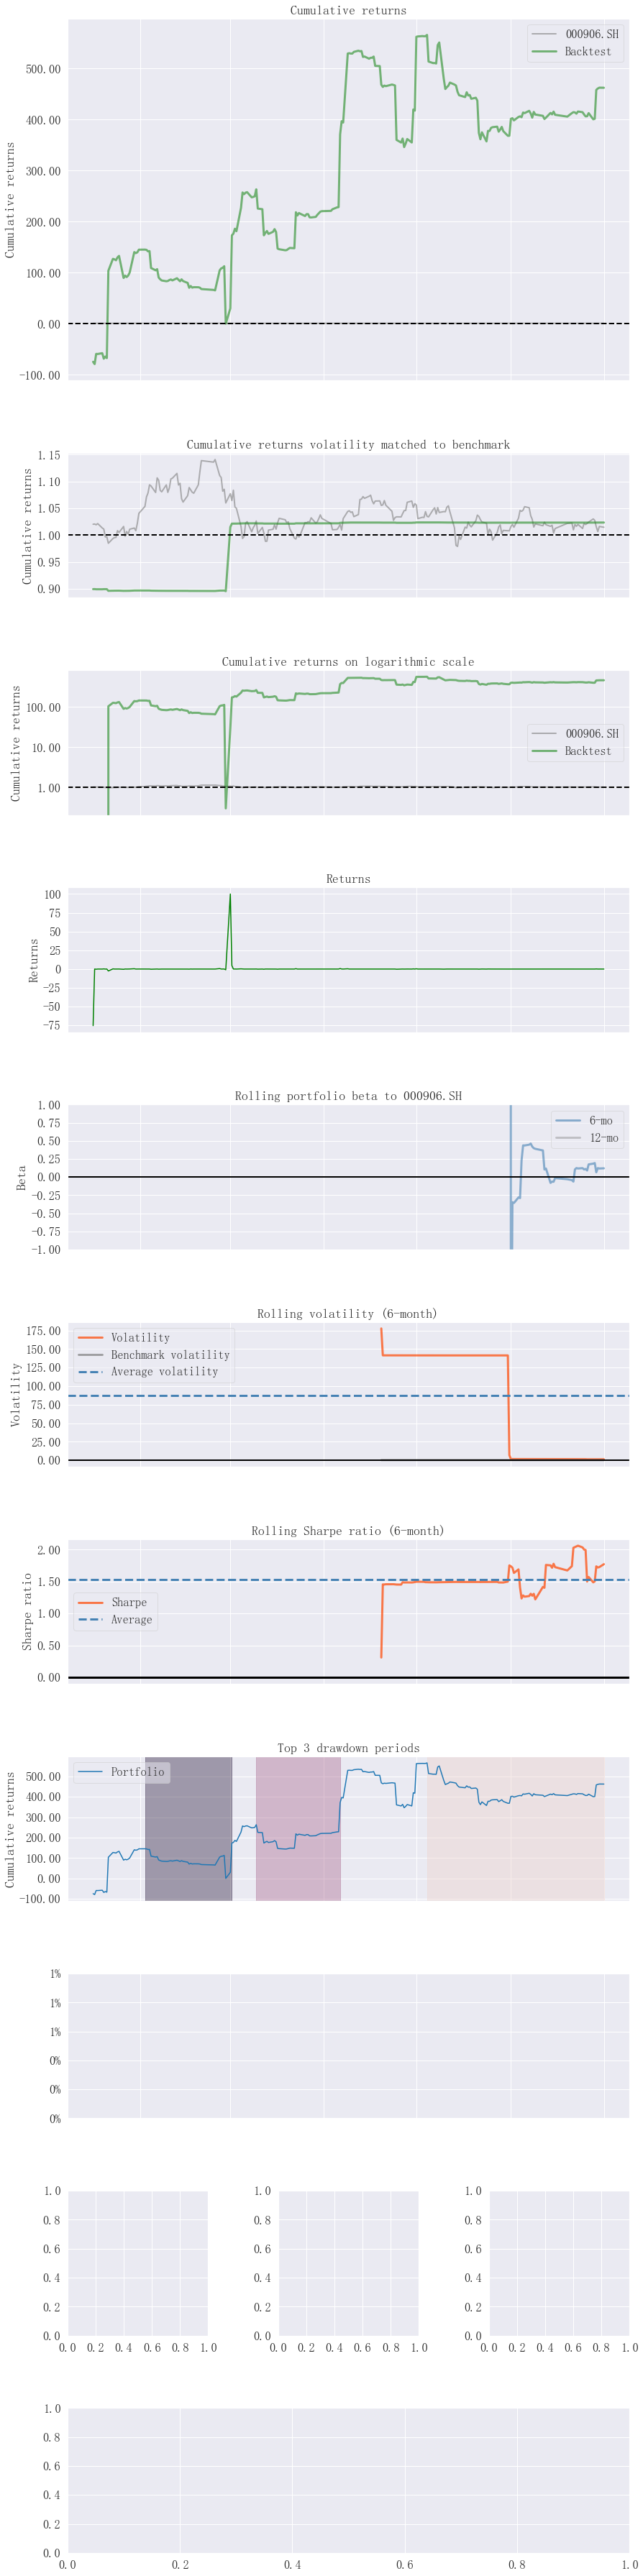

formation start	2019-11-01	formation end	2021-11-01
transaction start	2021-11-01	transaction end	2022-10-01
RESULTS will be saved at rev_result_2Y_11M//2021-11-01_2Y_2021-11-01_11M/


100%|██████████| 20/20 [00:05<00:00,  3.96it/s]


run cost time 73.4396333694458 s



Start date,2021-11-01
End date,2022-09-30
Total months,10
,Backtest
Annual return,68247.8%
Cumulative returns,35668.6%
Annual volatility,13953.6%
Sharpe ratio,0.36
Calmar ratio,21.82
Stability,NaN
Max drawdown,-3127.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3127.50,2021-12-24,2022-03-21,2022-09-16,191
1,450.80,2021-11-12,2021-11-15,2021-11-16,3
2,5.51,2021-11-16,2021-11-22,2021-11-23,6
3,3.28,2021-12-10,2021-12-16,2021-12-22,9
4,2.24,2021-12-07,2021-12-08,2021-12-10,4


ERR:TRANSACTION - 2021-11-01 TO 2022-10-01 evaluation NaT


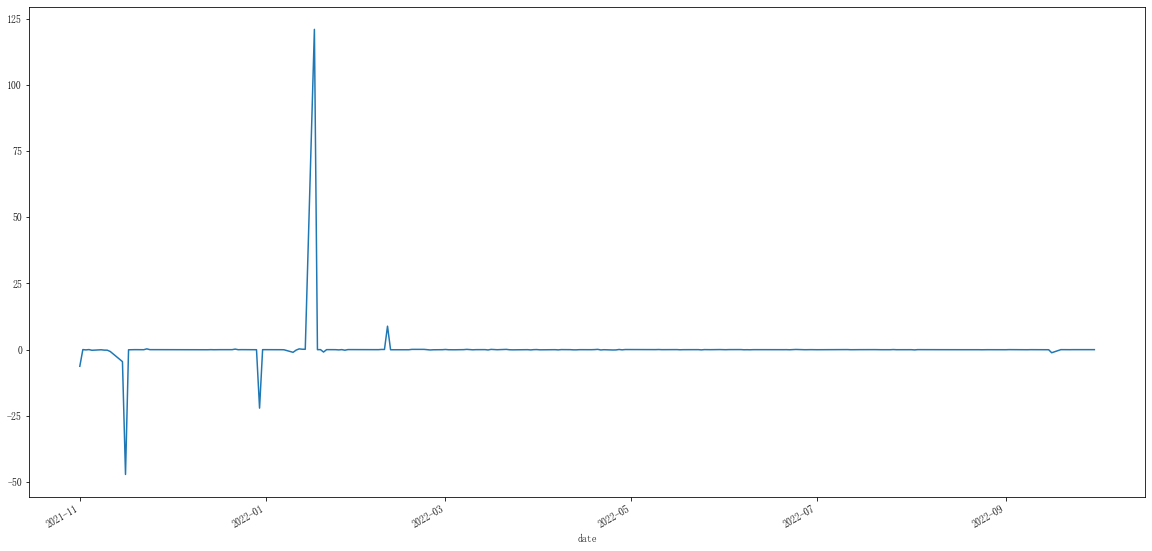

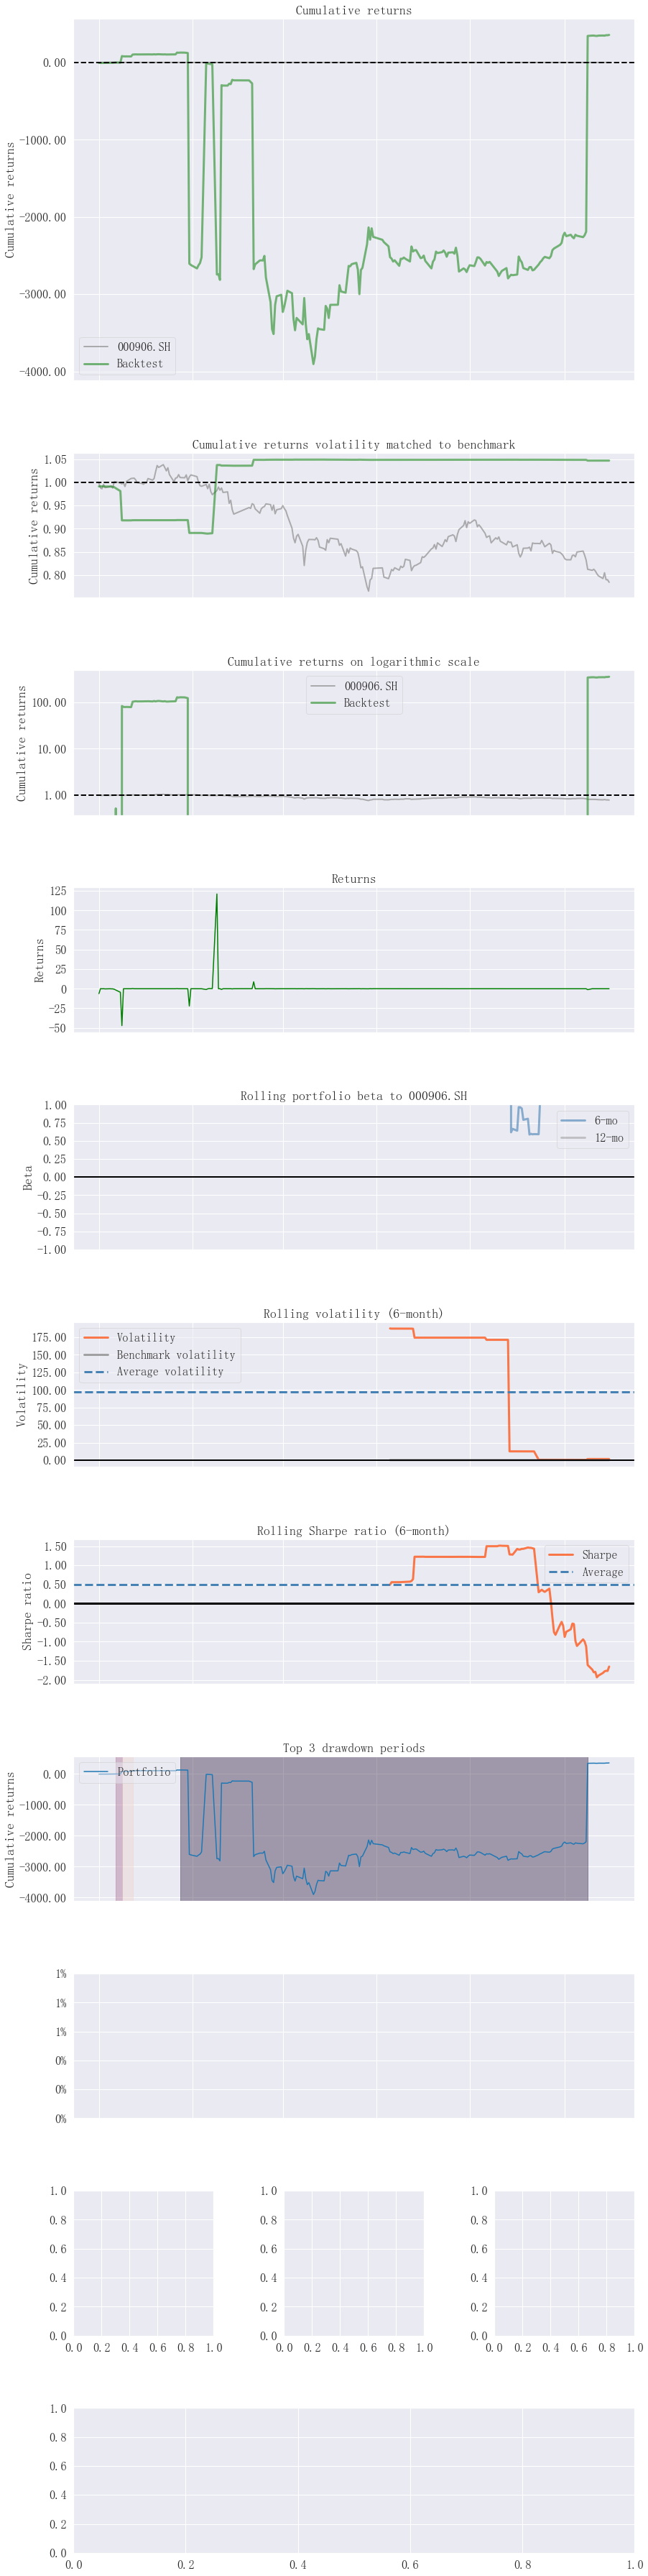

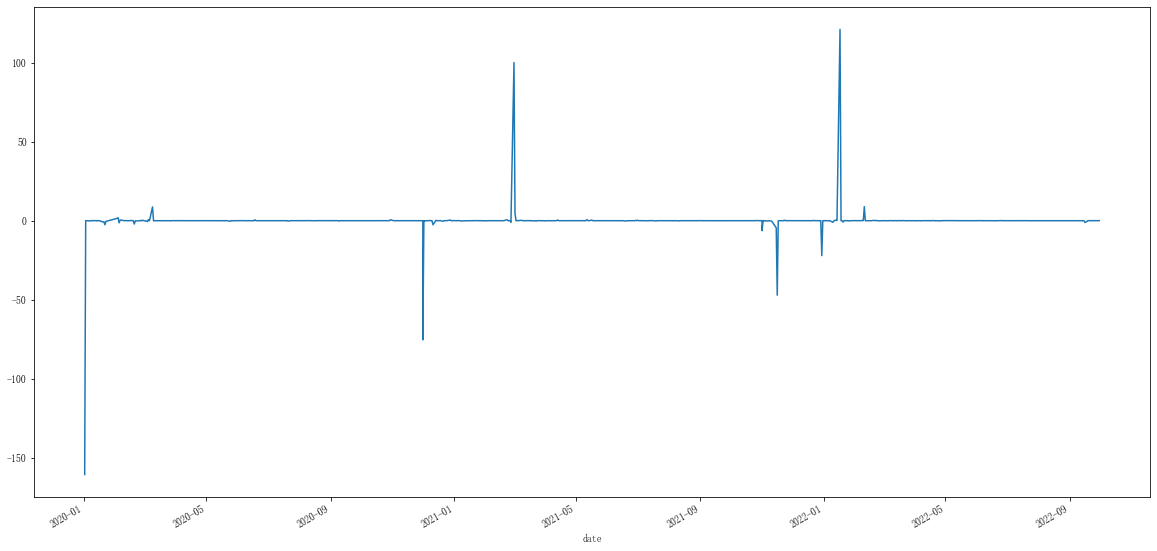

Start date,2020-01-02
End date,2022-09-30
Total months,31
,Backtest
Annual return,71877.5%
Cumulative returns,3949256326.7%
Annual volatility,14907.9%
Sharpe ratio,-0.21
Calmar ratio,4.42
Stability,NaN
Max drawdown,-16259.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7941.85,2020-11-26,2020-12-02,2020-12-11,12
1,3127.50,2021-12-24,2022-03-21,2022-09-16,191
2,545.69,2021-07-08,2021-11-02,2021-11-16,94
3,186.33,2020-02-04,2020-02-18,2020-03-09,25
4,99.79,2021-01-04,2021-02-26,2021-03-02,42


ValueError: When stacked is True, each column must be either all positive or all negative. Column 'None' contains both positive and negative values

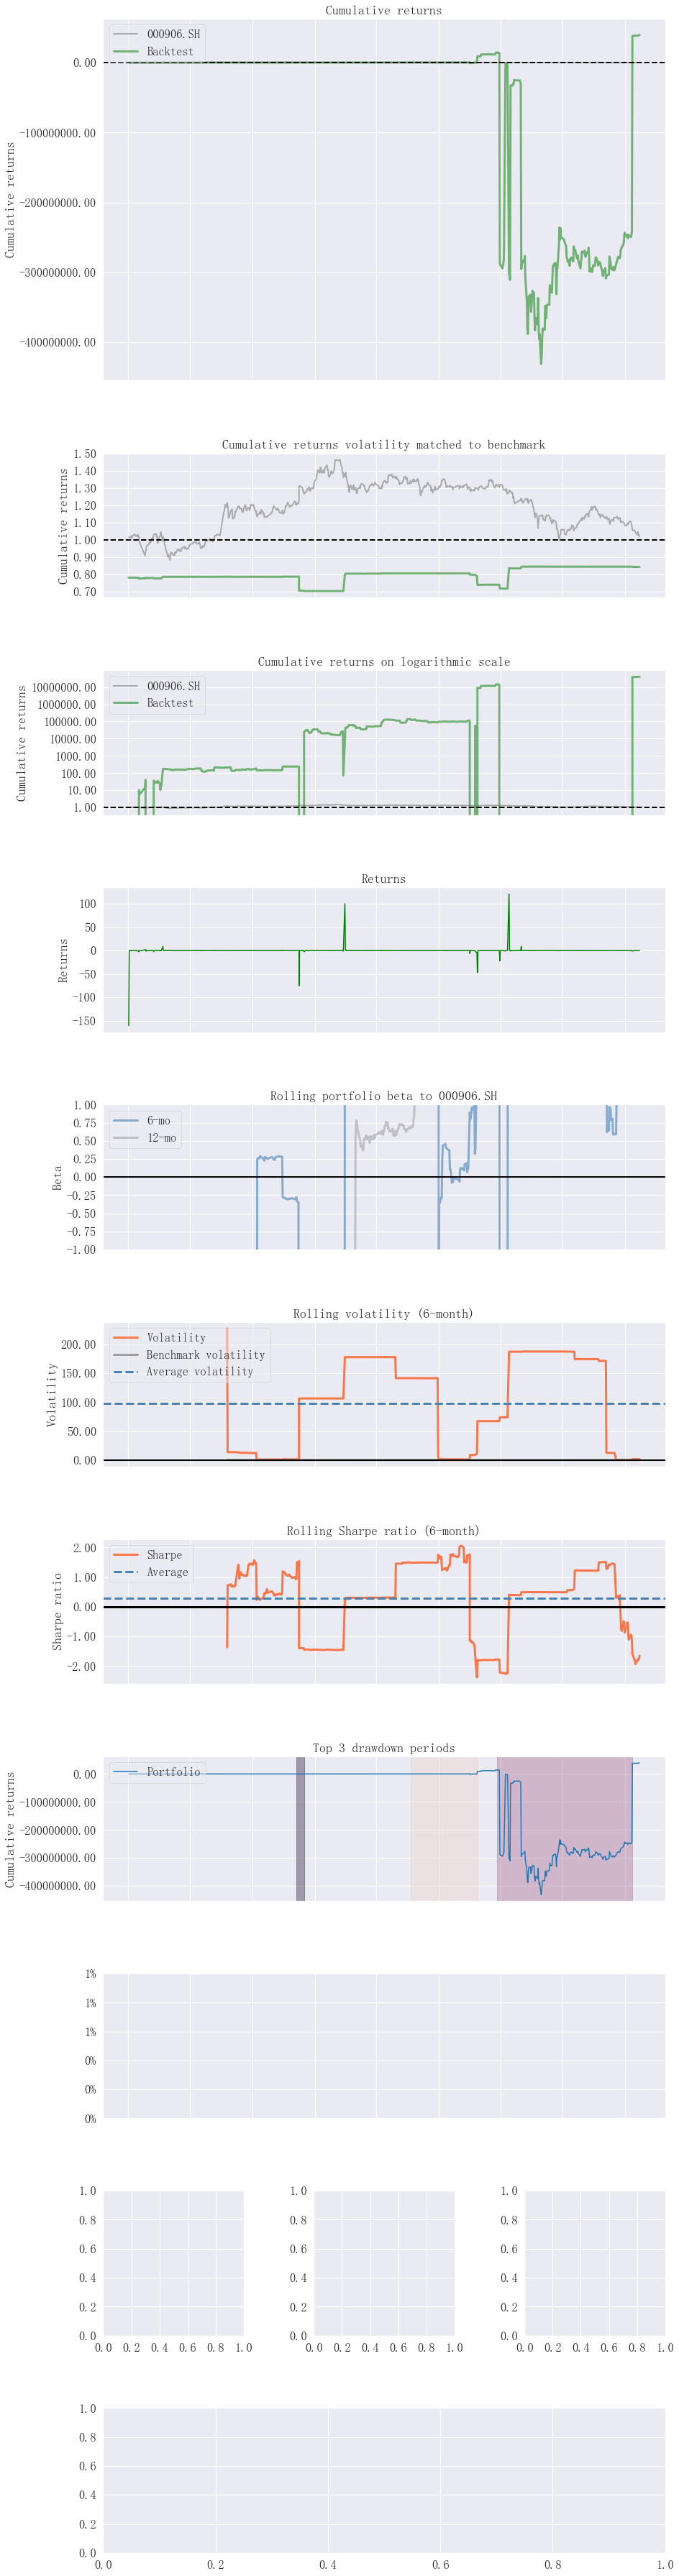

In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2023/1/31 14:14

@author: Susan
"""
import matplotlib.pyplot as plt
import pandas as pd
from CommonUse.funcs import read_pkl

from pt_utils.PairTrading import PairTrading

trans_start = '2020-01-01'
end_date = '2022-01-01'
out_folder = 'rev_result_2Y_11M/'

col = ['cash', 'value', 'rev']
flow_table = pd.DataFrame(columns=col)

pair_num = 20
invest_amount = 2e6
invest_num = invest_amount / pair_num
index_rev = read_pkl('raw/000906_ret.pkl')
# %% 策略执行
while trans_start <= end_date:
    pt = PairTrading(trans_start, trans_start, out_folder, form_y=2,trans_m=11,c=0.0015, c_ratio=0.0015, pair_num=pair_num, norm_bar=0.007)
    flow_df = pt.run(invest_num)
    try:
        pt.evaluation(flow_df, index_rev)
    except:
        print(f'ERR:TRANSACTION - {pt.trans_start} TO {pt.trans_end} evaluation NaT')
    plt.show()
    flow_table = pd.concat([flow_table, flow_df[col]])
    trans_start = pt.trans_end
PairTrading.clear_object_data()
flow_table.index.name = 'date'
flow_table.reset_index().to_csv(out_folder + '收益率交易收益汇总.csv', index=False)
plt.figure(figsize=(20, 10))
flow_table['rev'].plot()
plt.savefig(out_folder + f'收益率_{trans_start}_{end_date}.png')
plt.show()

PairTrading.evaluation(flow_table, index_rev)